In [ ]:
# Collect AuC and SID  and create correlation plot
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Initialize
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Collect data
subject_data = {}
for subject_id in subject_ids:
    subject_data[subject_id] = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

    # Process each epidermal scan for SID, AUC, and inflection depth
    for derm_scan in subject_data[subject_id].visit.epidermal:
        derm_scan.get_normalize_a_scan()
        
        # Approach 1 and 2 to find the inflection point
        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)
        
        # Get the inflection point depth
        inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
        
        # Get SID and AUC for the scan
        derm_scan.get_sid()
        derm_scan.get_AuC()

R09 1.4005602240896358 0.13212763325329213 0.140533
R09 1.2254901960784315 0.14398750748158234 0.1088
R09 1.3268472616360358 0.1383571750527282 0.0906667
R09 1.4829452033210557 0.13579731810928936 0.117867
R09 1.5898251192368842 0.1322608134902406 0.0861333
R09 1.5616856053581434 0.1307071014337503 0.0861333
R09 1.2881057921287076 0.13960263470869586 0.1496
R09 1.3169439656804405 0.14133495429411078 0.113333
R09 1.3786756786100194 0.1346885104926762 0.480533
R09 1.2170391567135685 0.14206128648867516 0.113333
R09 1.4117638754330144 0.13918819296698184 0.1088
R09 1.3895329953294322 0.13686447576811128 0.167733
R09 1.29757855621678 0.14102963522301826 0.0997333
R09 1.4117638754330144 0.13492293866309604 0.126933
R09 1.3574668311463978 0.13921803880894854 0.113333
R09 1.2427512648877719 0.1421447914339784 0.1088
R09 1.1609901504498112 0.14919256432795375 0.104267
R09 1.4705882352941175 0.1330054274567235 0.113333
R09 1.3071895424836601 0.13855457195833593 0.113333
R09 1.4584354997785 0.13

In [3]:
AuC = []
sid = []
inflection_depths = []

for subject_id in subject_data.keys():

    #Gather initial visit
    for scan in subject_data[subject_id].visit.epidermal:
        depth = scan.depth_data["Depth"][scan.min_location_index]
        if depth > 0.3: 
            continue
        AuC.append(scan.AuC)
        sid.append(scan.sid)
        inflection_depths.append(depth)

-0.5941765650429539 2.5127159763575284e-49


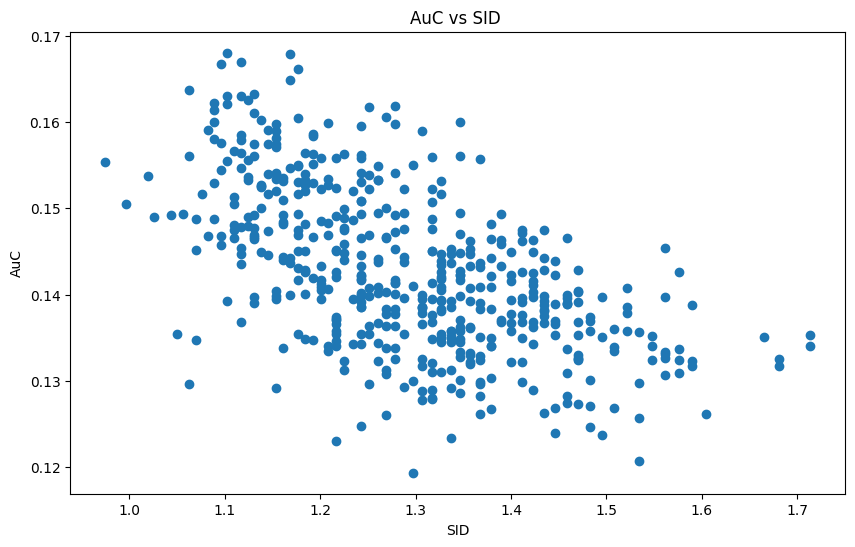

In [4]:
from scipy import stats
# Create a scatter plot of AuC vs SID

a = np.linspace(0, 1, len(AuC))
b = a*0.1 + np.random.random(len(a)) * 0.1 

plt.figure(figsize=(10, 6))
plt.scatter(sid, AuC)
# plt.scatter(a,b)
plt.title('AuC vs SID ')
plt.xlabel('SID')
plt.ylabel('AuC')

res = stats.spearmanr(sid, AuC)
print(res.statistic, res.pvalue)

-0.16802624902251695 0.00015308516776853237


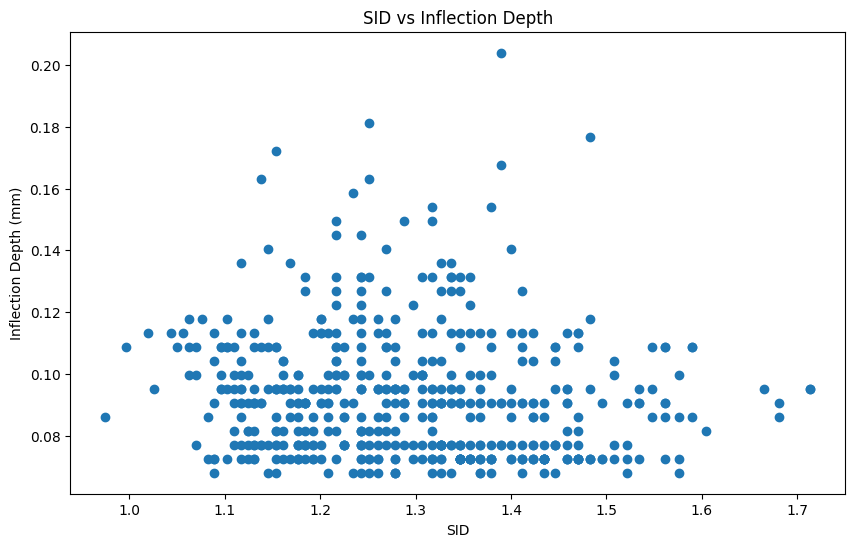

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(sid, inflection_depths)
# plt.scatter(a,b)
plt.title('SID vs Inflection Depth')
plt.xlabel('SID')
plt.ylabel('Inflection Depth (mm)')

res = stats.spearmanr(sid, inflection_depths)
print(res.statistic, res.pvalue)

-0.2329545832302508 1.2604596380730992e-07


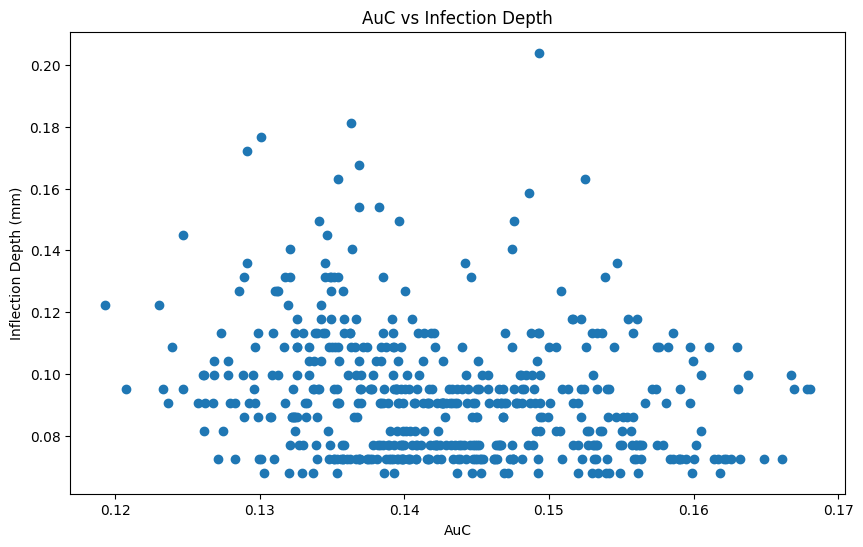

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(AuC, inflection_depths)
# plt.scatter(a,b)
plt.title('AuC vs Infection Depth')
plt.xlabel('AuC')
plt.ylabel('Inflection Depth (mm)')

res = stats.spearmanr(AuC, inflection_depths)
print(res.statistic, res.pvalue)

